<a href="https://colab.research.google.com/github/himanshujaiswal8448/Iris/blob/main/Iris_Classification_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Classification Problem

Along this notebook we'll explain how to use the power of cloud computing with Google Colab for a classical example –*The Iris Classification Problem*– using the popular [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set).

For this classification problem we will build a simple feed-forward full-connected artificial neural network.

The Python framework that we will be using is [Tensorflow 2.0](https://www.tensorflow.org) with the [Keras](https://keras.io/) module.


### Problem statement

Before we tackle the problem an ANN, let's understand what we'll be doing:

* If we feed our neural network with Iris data, the model should be able to determine what species it is.

> #### What do we need to do?
> Train a _Deep Learning_ model (in this case) using a known dataset: [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set).
>
> Specifically, we are going to do the following:
> - Load the dataset
> - Preprocess the data
> - Build the model
> - Set hyperparameters
> - Train the model
> - Save and download the trained model
> - Predict data

## Installing dependencies

For our training we will be using Tensorflow 2.0, so we want to be sure it is installed on its latest version:

In [ ]:
# Install TensorFlow 2.0 Release Candidate 0
!pip install tensorflow

# Import TensorFlow and print its version to verify installation
import tensorflow as tf
print(tf.__version__)



2.18.0


## The Iris dataset

In [ ]:
from IPython.display import HTML
url = 'https://en.wikipedia.org/wiki/Iris_flower_data_set'
iframe = '<iframe src=' + url + ' width="100%" height=400></iframe>'
HTML(iframe)

/usr/local/lib/python3.11/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## Importing the dataset

In [ ]:
# Importing dataset from scikit-learn and other useful packages:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

# We will fix a random seed for reproducibility:
seed = 11
np.random.seed(seed)

In [ ]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Set features and labels
x = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Display selected elements
elements_to_display = [0, 50, 100]  # Example indices from each class
for element in elements_to_display:
    print(f"Element {element}th:")
    print(f"  - Features: {x[element]}")
    print(f"  - Target: {y[element]}")
    print(f"  - Species: {names[y[element]]}")
    print()


Element 0th:
  - Features: [5.1 3.5 1.4 0.2]
  - Target: 0
  - Species: setosa

Element 50th:
  - Features: [7.  3.2 4.7 1.4]
  - Target: 1
  - Species: versicolor

Element 100th:
  - Features: [6.3 3.3 6.  2.5]
  - Target: 2
  - Species: virginica



## Preprocess dataset

The preprocess step results very important in many cases. For this case, we will just need to do a very simple transformation: a one hot encode process.

In [ ]:
from tensorflow import keras

# One hot encode outputs:
y = keras.utils.to_categorical(y)

# Set global variables:
n_features = len(feature_names)
n_classes = names.shape[0]

# Let's checkout changes:
for element in elements_to_display:
    print(f"Element {element}th:")
    print(f"  - Features: {x[element]}")
    print(f"  - Target: {y[element]}")
    print(f"  - Species: {names[element % 3]}")
    print()


# Split the data set into training and testing sets:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=seed)

Element 0th:
  - Features: [5.1 3.5 1.4 0.2]
  - Target: [1. 0. 0.]
  - Species: setosa

Element 50th:
  - Features: [7.  3.2 4.7 1.4]
  - Target: [0. 1. 0.]
  - Species: virginica

Element 100th:
  - Features: [6.3 3.3 6.  2.5]
  - Target: [0. 0. 1.]
  - Species: versicolor



## Let's talk about the model...

We will be using a very simple model, a feed-forward multi-layer perceptron.

### Let's create the model with Keras!

First of all, let's import what we'll use:

In [ ]:
# Let's import our Keras stuff:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

def iris_model(input_dim, output_dim, init_nodes=4, name='model'):
    """FF-MLP model for Iris classification problem."""

    # Create model:
    model = Sequential(name=name)
    # Add Dense -> init_nodes, input_dim=input_dim, activation='relu'
    # Add Dense -> 2*init_nodes, activation='relu'
    # Add Dense -> 3*init_nodes, activation='relu'
    # Add Dense -> output_dim, activation='softmax'

    # Compile model:
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

### Useful resources

- Sequential model: <https://keras.io/getting-started/sequential-model-guide/>
- Classifying the Iris Data Set with Keras: <https://janakiev.com/notebooks/keras-iris/>

### Building the model

In [ ]:
# Build the model
model = Sequential([
    Dense(10, activation='relu', input_shape=(4,)),  # 4 features in Iris dataset
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')  # 3 output classes: setosa, versicolor, virginica
])

# Print the model summary
model.summary()



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

### Training the model

In order to train the model, we first need to set its training hyperparameters.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load the Iris dataset
iris = load_iris()
x = iris['data']
y = iris['target']
names = iris['target_names']

# One-hot encode the target labels
y_encoded = to_categorical(y)  # Converts shape from (150,) to (150, 3)

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

# Build the model
model = Sequential([
    Dense(10, activation='relu', input_shape=(4,)),  # 4 features in Iris dataset
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')  # 3 output classes
])

# Print the model summary
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Set hyperparameters
epochs = 50
batch = 16

# Fit the model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    verbose=True,
                    epochs=epochs,
                    batch_size=batch)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 204ms/step - accuracy: 0.0000e+00 - loss: 2.0637 - val_accuracy: 0.0000e+00 - val_loss: 1.9078
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0000e+00 - loss: 1.8634 - val_accuracy: 0.0000e+00 - val_loss: 1.7158
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 1.7208 - val_accuracy: 0.0000e+00 - val_loss: 1.5523
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 1.5724 - val_accuracy: 0.0000e+00 - val_loss: 1.4112
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 1.4079 - val_accuracy: 0.0000e+00 - val_loss: 1.3009
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 1.2947 - val_accuracy: 0.0000e+00 - val_loss: 1.2057
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0059 - loss: 1.2170 - val_accuracy: 0.1000 - val_loss: 1.1368
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2566 - loss: 

### Evaluating the results

In [ ]:
# Final evaluation of the model:
scores = model.evaluate(x_test, y_test, verbose=1)
print(f'Test accuracy: {scores[1]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.9667 - loss: 0.4747
Test accuracy: 0.9666666388511658


### Plot the training along the time

In [ ]:
def plot_loss(history):
    plt.style.use("ggplot")
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("Model's training loss")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()


def plot_accuracy(history):
    plt.style.use("ggplot")
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title("Model's training accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [ ]:
plot_loss(history)
plot_accuracy(history)

_How can we save these plots?_

## Saving a model

To save the trained model we will basically do two things:

1. Serialize the model into a JSON file, which will save the architecture of our model.
2. Serialize the weights into a HDF5 file, which will save all parameters of our model.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9667 - loss: 0.4747
Test accuracy: 0.9667
Model weights saved to disk.


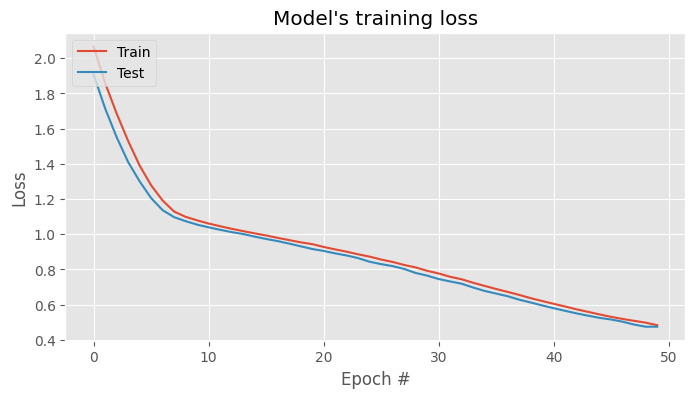

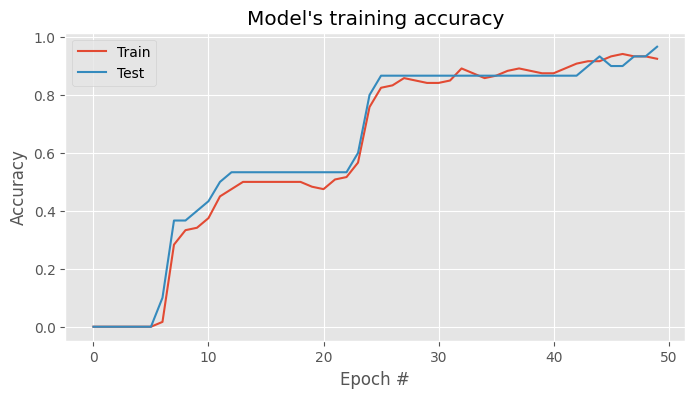

In [ ]:
# Final evaluation of the model:
scores = model.evaluate(x_test, y_test, verbose=1)
print(f'Test accuracy: {scores[1]:.4f}')

# Serialize model to JSON:
model_json = model.to_json()
with open("iris_model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("iris_model.weights.h5")
print("Model weights saved to disk.")


# Optional: Save the entire model
# model.save("iris_model_full.h5")

# Plotting functions
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.style.use("ggplot")
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("Model's training loss")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

def plot_accuracy(history):
    plt.style.use("ggplot")
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title("Model's training accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# Call plot functions
plot_loss(history)
plot_accuracy(history)


## Downloading a model

We just need to import the Google Colab module and download the specified files.

In [ ]:
from google.colab import files

model_files = ['iris_model.json', 'iris_model.weights.h5']
for file in model_files:
    files.download(file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Loading a trained model
We will basically do three things:

1. Load the model from a JSON file.
2. Load the weights from a HDF5 file.
3. (Re)Compile the trained model.

In [ ]:
# Load json and create model
from tensorflow.keras.models import model_from_json

with open('iris_model.json', 'r') as json_file:
    loaded_model_json = json_file.read()

loaded_model = model_from_json(loaded_model_json)

# Load weights into the loaded model
loaded_model.load_weights("iris_model.weights.h5")
print("Model loaded from disk.")

Model loaded from disk.


In [ ]:
# Evaluate loaded model on test data:
loaded_model.compile(loss='categorical_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])

score = loaded_model.evaluate(x_test, y_test, verbose=1)
print(f'Test accuracy: {score[1]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step - accuracy: 0.9667 - loss: 0.4747
Test accuracy: 0.9666666388511658


## Predicting from new data

Now that we have a trained model, how do we use it?

It is as simple as follows:

In [ ]:
# Remembering some elements:
for element in elements_to_display:
    prediction_vector = model.predict(np.array([x[element]]))
    print(f"Element {element}th:")
    print(f"  - Features: {x[element]}")
    print(f"  - Target: {y[element]}")
    print(f"  - Scpecies: {names[np.argmax(y[element])]}")
    print(f"  - Predicted species: {names[np.argmax(prediction_vector)]}")
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Element 0th:
  - Features: [5.1 3.5 1.4 0.2]
  - Target: 0
  - Scpecies: setosa
  - Predicted species: setosa

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Element 50th:
  - Features: [7.  3.2 4.7 1.4]
  - Target: 1
  - Scpecies: setosa
  - Predicted species: versicolor

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Element 100th:
  - Features: [6.3 3.3 6.  2.5]
  - Target: 2
  - Scpecies: setosa
  - Predicted species: virginica

